In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns

In [ ]:
# load the .env file variables
load_dotenv()

# Spotify API credentials
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [ ]:
#Configuración de la conexion a la API
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)
artist_id = 'spotify:artist:2ye2Wgw4gimLv2eAKyk1NB'
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [ ]:
top_tracks_data = spotify.artist_top_tracks(artist_id)
tracks = top_tracks_data['tracks']
df_tracks = pd.DataFrame(tracks)
df_tracks_popularity = df_tracks[['name', 'popularity', 'duration_ms', 'uri']].head(3)


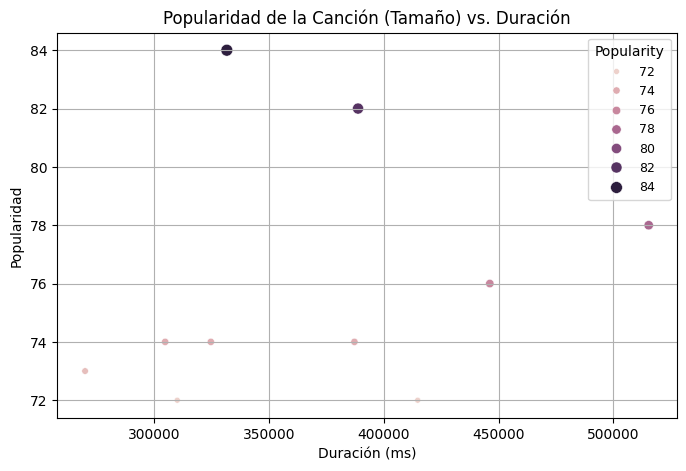

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_tracks,
    x='duration_ms',
    y='popularity',
    size='popularity',
    hue='popularity',
    alpha=1,
)
plt.title('Popularidad de la Canción (Tamaño) vs. Duración')
plt.xlabel('Duración (ms)')
plt.ylabel('Popularidad')
plt.grid()
plt.legend(
    title='Popularity',
    loc='best',
    borderpad=0.5,
    labelspacing=0.5,
    handlelength=2.0,
    fontsize=9
)
plt.show()

# --------Análisis---------
# Podemos observar como la duración de la canción no determina
# el nivel de popularidad. La canción mas popular 
# tienen una duración inferior a la mediana